<IPython.core.display.Javascript object>


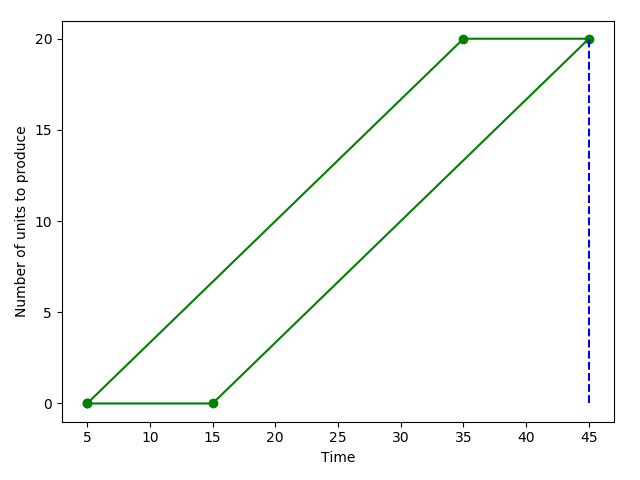

In [52]:
%matplotlib notebook
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

def generate_single_plot(x1, x2, x3, x4):
    """Generate plot from points"""
    vertical_1x = [x1, x3]
    vertical_2x = [x2, x4]
    horizontal_1x = [x1, x2]
    horizontal_2x = [x3, x4]
    drop_line = [x4, x4]

    join_1y = [0, 20]
    join_2y = [0, 0]
    join_3y = [20, 20]

    space = np.linspace(0, 20, 5)
    plt.yticks(space)
    plt.ylabel("Number of units to produce")
    plt.xlabel("Time")
    plt.tight_layout()

    Path = mpath.Path
    path_data = [
        (Path.MOVETO, (x1, 0)),
        (Path.LINETO, (x3, 20)),
        (Path.LINETO, (x4, 20)),
        (Path.LINETO, (x2, 0)),
        (Path.CLOSEPOLY, (x1, 0))
    ]
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)

    # plot control points and connecting lines
    x, y = zip(*path.vertices)
    plt.plot(x, y, 'go-')

    plt.plot(drop_line, join_1y, 'b--')

    plt.show()

generate_single_plot(5, 15, 35, 45)

<IPython.core.display.Javascript object>


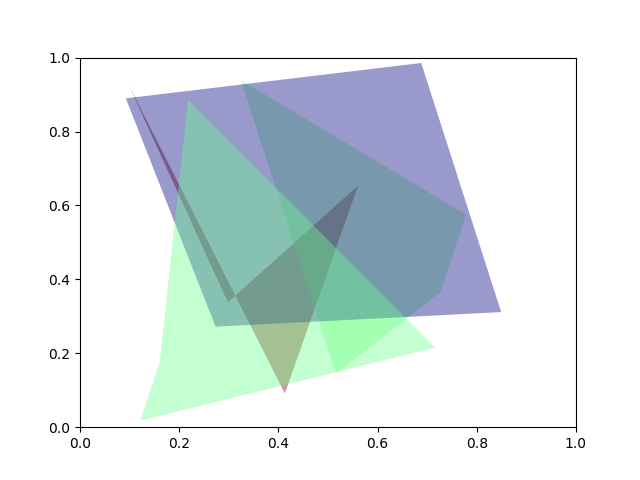

In [58]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots()
patches = []
N = 4

for i in range(N):
    polygon = Polygon(np.random.rand(N,2), True)
    patches.append(polygon)
Patches.append(Polygon())

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)

plt.show()

In [59]:
from matplotlib.patches import Polygon


<IPython.core.display.Javascript object>


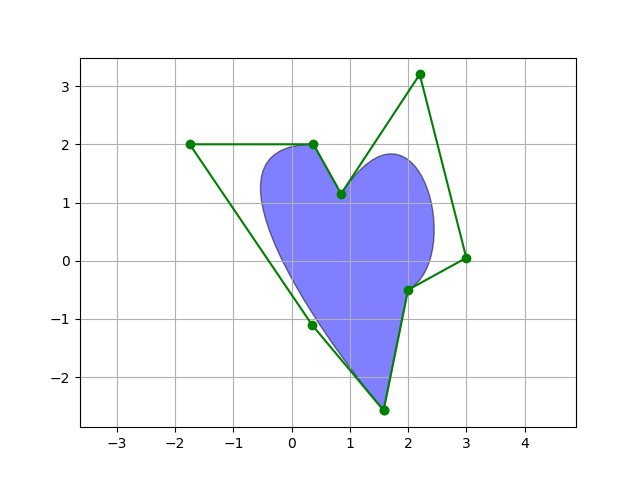

In [43]:
"""
Demo of a PathPatch object.
"""
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='b', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

In [ ]:
from line_of_balance import *

In [ ]:
default_diagram()

In [ ]:
# print(p.start_on_first_section())
# print(p.end_on_first_section())
# print(p.start_on_last_section())
# print(p.end_on_last_section())
# print(p.start_first_to_start_last())
# print(p.activity_duration_per_unit())
# print(p.theoretical_gang_size())
# print(p.actual_gang_size())
# print(p.actual_output_rate())
# print(p.man_hours_per_unit)

a = p.start_on_first_section()
b = p.end_on_first_section()
c = p.start_on_last_section()
d = p.end_on_last_section()

**Known parameters - scalar**

1. Number of sections to produce, $n$
2. Buffer time
3. Desired output rate, $r$
4. Hours of work per day
5. Days of work per week

**Known parameters - sequence**
1. Activity names
2. Manhours per unit required for each activity
3. Number of men per gang for each activity

**Parameters to be calculated**

1. Theoretical gang size required to complete each activity
2. Actual gang size required for each activity.
3. Actual output rate for each activity
4. Duration to complete a unit of each activity (activity duration per unit)
5. Time from start on first section to start on last section of each activity. This could also be interpreted as the time from end of first section to end of last section
6. Time of start on first section for each activity
7. Time of end on first section for each activity
8. Time of start on last section for each activity
9. Time of end on last section for each activity

**Calculations**

The actual gang size should be a multiple (at least 2) of the number of men per gang that is closest in value to the theoretical gang size

$
\text{actual_output_rate} = \text{desired_output_rate } * \frac{\text{actual_gang_size}}{\text{theoretical_gang_size}}\\
$

$
\text{start_on_first_section_to_last_section} = \text{desired_output_rate } * \frac{(\text{number_of_sections_to_produce } - 1) * \text{ days_per_week}}{\text{actual_output_rate}}
$

$
\text{theoretical_gang_size} = \frac{\text{desired_output_rate } * \text{ man_hours_per_unit}}{\text{hours_per_day } * \text{ days_per_week}}
$

$
\text{activity_duration_per_unit} = \frac{\text{ man_hours_per_unit}}{\text{men_per_gang} * \text{ hours_per_day}}
$

**Placement of Buffer time**

When drawing the bars for the different activities, compare the values of the actual output rate for each activity to determine where to place the buffer.

If the actual output rate of the activity under consideration is smaller than that of the preceding activity (meaning that the activity in consideration is slower), place the buffer at the bottom of the graph, by adding it to the value of the time to finish last section of the preceding activity.

Activity|man_hours_per_unit|men_per_gang|theoretical_gang_size|actual_gang_size|actual_output_rate|activity_duration_per_unit|start_on_first_section_to_last_section|start_on_first_section|end_on_first_section|start_on_last_section|end_on_last_section
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
1|2|3|4|5|6|7|8|9|10|11|12